# 🔄 Analisi Turnover e Retention

Analisi tassi di turnover, retention e raccomandazioni.

**Data creazione**: 18/07/2025

---

In [1]:
# 📁 SETUP E CARICAMENTO DATI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione grafici
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

# Carica dati con encoding corretto
try:
    df = pd.read_csv('hr_data_con_turnover.csv', encoding='utf-8')
    print(f"Dataset caricato: {len(df)} dipendenti")
    
    # Converti date
    date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
    
    # Calcola età e anzianità
    oggi = pd.Timestamp.now()
    if 'DateOfBirth' in df.columns:
        eta_days = (oggi - df['DateOfBirth']).dt.days
        df['Eta'] = (eta_days / 365.25).round().astype('Int64')
    
    if 'HiringDate' in df.columns:
        servizio_days = (oggi - df['HiringDate']).dt.days
        df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
    
    print("Dati preparati per l'analisi!")
    
except UnicodeDecodeError:
    # Fallback con encoding diverso
    try:
        df = pd.read_csv('hr_data_con_turnover.csv', encoding='latin-1')
        print(f"Dataset caricato con encoding latin-1: {len(df)} dipendenti")
        # Ripeti la preparazione dati
        date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
        oggi = pd.Timestamp.now()
        if 'DateOfBirth' in df.columns:
            eta_days = (oggi - df['DateOfBirth']).dt.days
            df['Eta'] = (eta_days / 365.25).round().astype('Int64')
        if 'HiringDate' in df.columns:
            servizio_days = (oggi - df['HiringDate']).dt.days
            df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
        print("Dati preparati per l'analisi!")
    except:
        print("Errore nel caricamento del dataset")
        df = None
except Exception as e:
    print(f"Errore: {e}")
    df = None

Dataset caricato: 250 dipendenti
Dati preparati per l'analisi!


In [2]:

# 📁 Importazione dati dal dashboard principale
# Esegui prima il dashboard principale per caricare i dati

try:
    # Verifica se i dati sono già caricati
    if 'df' in globals():
        print(f"✅ Dati già disponibili: {len(df)} dipendenti")
    else:
        # Carica i dati direttamente
        exec(open('carica_dati_hr.py').read())
        print(f"✅ Dati caricati: {len(df)} dipendenti")
except:
    print("⚠️  Esegui prima il dashboard principale (00_HR_Dashboard_Principale.ipynb)")
    print("   oppure carica manualmente i dati HR")


✅ Dati già disponibili: 250 dipendenti



## 🔄 Analisi Turnover Generale

Analisi completa dei tassi di turnover con focus particolare sul gender gap.


In [3]:

# 🔄 ANALISI TURNOVER GENERALE
if df is not None:
    print("🔄 ANALISI TURNOVER E RETENTION")
    print("=" * 50)
    
    # Separa dipendenti attivi e usciti
    if 'EmploymentStatus' in df.columns:
        df_attivi = df[df['EmploymentStatus'] == 'Active']
        df_usciti = df[df['EmploymentStatus'] == 'Terminated']
        
        print(f"👥 **Panoramica Generale:**")
        print(f"   • Dipendenti attivi: {len(df_attivi):,}")
        print(f"   • Dipendenti usciti: {len(df_usciti):,}")
        print(f"   • Tasso turnover globale: {len(df_usciti)/len(df)*100:.1f}%")
        
        # Analisi per genere
        if 'Gender' in df.columns:
            print(f"\n👥 **TURNOVER PER GENERE:**")
            
            # Calcola tassi per genere
            for gender in ['M', 'F']:
                gender_label = "Uomini" if gender == 'M' else "Donne"
                
                attivi_gender = len(df_attivi[df_attivi['Gender'] == gender])
                usciti_gender = len(df_usciti[df_usciti['Gender'] == gender])
                totale_gender = attivi_gender + usciti_gender
                
                if totale_gender > 0:
                    turnover_rate = usciti_gender / totale_gender * 100
                    print(f"   🚹🚺 **{gender_label}:**")
                    print(f"      • Attivi: {attivi_gender:,}")
                    print(f"      • Usciti: {usciti_gender:,}")
                    print(f"      • Tasso turnover: {turnover_rate:.1f}%")
            
            # Calcola gender gap turnover
            m_total = len(df[df['Gender'] == 'M'])
            f_total = len(df[df['Gender'] == 'F'])
            m_usciti = len(df_usciti[df_usciti['Gender'] == 'M'])
            f_usciti = len(df_usciti[df_usciti['Gender'] == 'F'])
            
            if m_total > 0 and f_total > 0:
                turnover_m = m_usciti / m_total * 100
                turnover_f = f_usciti / f_total * 100
                gap = turnover_f - turnover_m
                
                print(f"\n⚖️  **GENDER GAP TURNOVER: {gap:.1f} punti percentuali**")
                
                if gap > 20:
                    print(f"🚨 **EMERGENZA**: Turnover femminile critico!")
                elif gap > 10:
                    print(f"⚠️  **ALTO RISCHIO**: Significativo gap di genere")
                elif gap > 5:
                    print(f"📋 **MONITORAGGIO**: Gap moderato da tenere sotto controllo")
                else:
                    print(f"✅ **EQUILIBRATO**: Gap contenuto")
    else:
        print("ℹ️  Dataset non contiene informazioni su turnover")
        print("   Analisi limitata ai dipendenti attuali")


🔄 ANALISI TURNOVER E RETENTION
👥 **Panoramica Generale:**
   • Dipendenti attivi: 150
   • Dipendenti usciti: 100
   • Tasso turnover globale: 40.0%

👥 **TURNOVER PER GENERE:**
   🚹🚺 **Uomini:**
      • Attivi: 105
      • Usciti: 25
      • Tasso turnover: 19.2%
   🚹🚺 **Donne:**
      • Attivi: 45
      • Usciti: 75
      • Tasso turnover: 62.5%

⚖️  **GENDER GAP TURNOVER: 43.3 punti percentuali**
🚨 **EMERGENZA**: Turnover femminile critico!



## 🏢 Turnover per Dipartimento

Identificazione dei dipartimenti con maggiori problemi di retention.


In [4]:

# 🏢 ANALISI TURNOVER PER DIPARTIMENTO
if df is not None and 'EmploymentStatus' in df.columns and 'Department' in df.columns:
    
    print("🏢 TURNOVER PER DIPARTIMENTO")
    print("=" * 40)
    
    # Analisi per ogni dipartimento
    dept_analysis = []
    
    for dept in df['Department'].unique():
        dept_df = df[df['Department'] == dept]
        dept_attivi = len(dept_df[dept_df['EmploymentStatus'] == 'Active'])
        dept_usciti = len(dept_df[dept_df['EmploymentStatus'] == 'Terminated'])
        dept_totale = dept_attivi + dept_usciti
        
        if dept_totale > 0:
            dept_turnover = dept_usciti / dept_totale * 100
            
            dept_analysis.append({
                'Dipartimento': dept,
                'Attivi': dept_attivi,
                'Usciti': dept_usciti,
                'Totale': dept_totale,
                'Turnover%': dept_turnover
            })
    
    # Ordina per turnover decrescente
    dept_analysis.sort(key=lambda x: x['Turnover%'], reverse=True)
    
    print("📊 **Classifica Turnover per Dipartimento:**")
    for i, dept in enumerate(dept_analysis, 1):
        status_icon = "🚨" if dept['Turnover%'] > 40 else "⚠️" if dept['Turnover%'] > 25 else "📋" if dept['Turnover%'] > 15 else "✅"
        print(f"   {i:2d}. {status_icon} {dept['Dipartimento']}: {dept['Usciti']}/{dept['Totale']} ({dept['Turnover%']:.1f}%)")
    
    # Identifica dipartimenti critici
    dept_critici = [d for d in dept_analysis if d['Turnover%'] > 40]
    if dept_critici:
        print(f"\n🚨 **DIPARTIMENTI IN CRISI** (turnover > 40%):")
        for dept in dept_critici:
            print(f"   • {dept['Dipartimento']}: {dept['Turnover%']:.1f}% turnover")
        print(f"   → Intervento manageriale URGENTE necessario")
    
    # Raccomandazioni per dipartimenti
    print(f"\n🎯 **RACCOMANDAZIONI PER DIPARTIMENTO:**")
    for dept in dept_analysis[:3]:  # Top 3 con più turnover
        if dept['Turnover%'] > 25:
            print(f"   • **{dept['Dipartimento']}** ({dept['Turnover%']:.1f}%):")
            print(f"     → Exit interview approfondite")
            print(f"     → Revisione management e cultura del team")
            print(f"     → Programmi di retention specifici")


🏢 TURNOVER PER DIPARTIMENTO
📊 **Classifica Turnover per Dipartimento:**
    1. 🚨 HR: 21/21 (100.0%)
    2. 🚨 Marketing: 20/20 (100.0%)
    3. 🚨 Amministrazione: 23/48 (47.9%)
    4. ⚠️ Vendite: 26/69 (37.7%)
    5. ✅ Produzione: 7/48 (14.6%)
    6. ✅ IT: 3/44 (6.8%)

🚨 **DIPARTIMENTI IN CRISI** (turnover > 40%):
   • HR: 100.0% turnover
   • Marketing: 100.0% turnover
   • Amministrazione: 47.9% turnover
   → Intervento manageriale URGENTE necessario

🎯 **RACCOMANDAZIONI PER DIPARTIMENTO:**
   • **HR** (100.0%):
     → Exit interview approfondite
     → Revisione management e cultura del team
     → Programmi di retention specifici
   • **Marketing** (100.0%):
     → Exit interview approfondite
     → Revisione management e cultura del team
     → Programmi di retention specifici
   • **Amministrazione** (47.9%):
     → Exit interview approfondite
     → Revisione management e cultura del team
     → Programmi di retention specifici



## 📊 Visualizzazioni Turnover

Grafici per comprendere meglio i pattern di turnover.


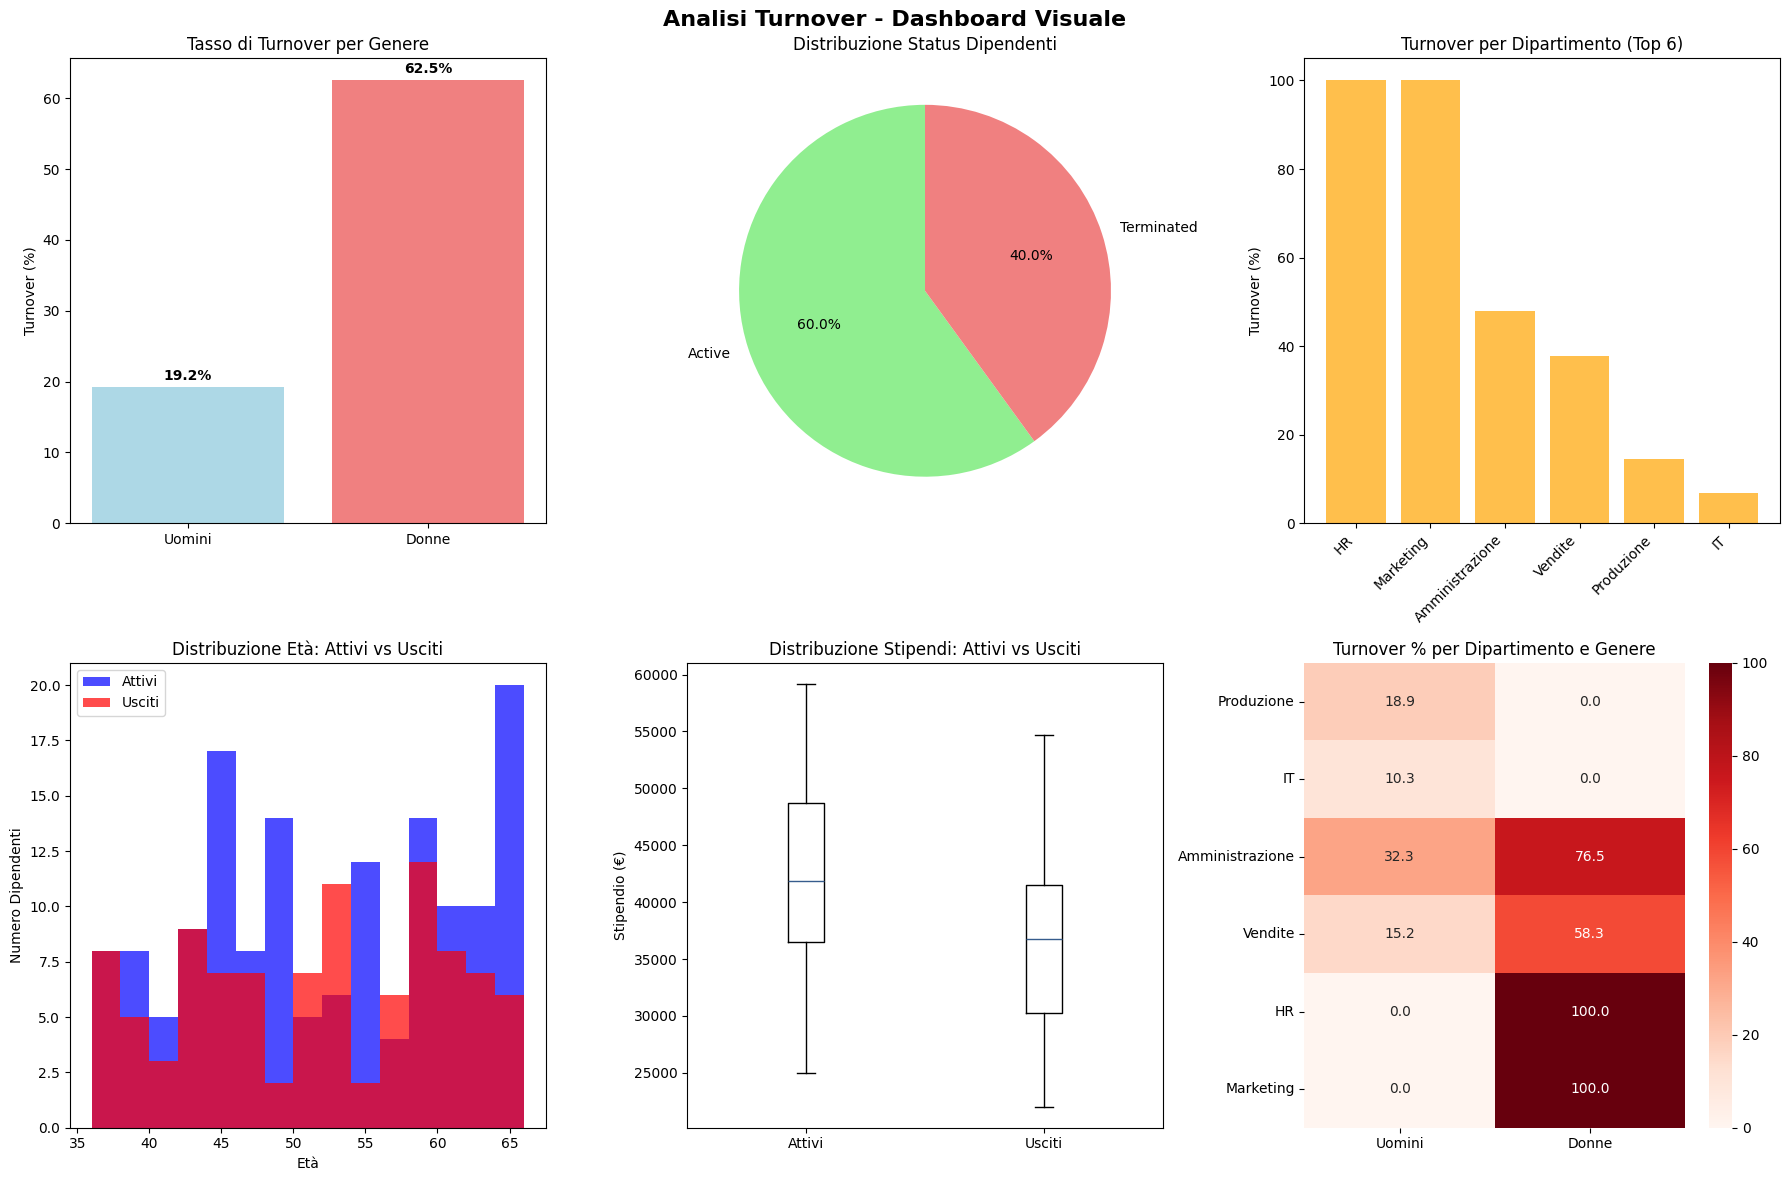

In [5]:

# 📊 VISUALIZZAZIONI TURNOVER
if df is not None and 'EmploymentStatus' in df.columns:
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Analisi Turnover - Dashboard Visuale', fontsize=16, fontweight='bold')
    
    # Grafico 1: Turnover per genere
    if 'Gender' in df.columns:
        turnover_data = []
        labels = []
        
        for gender in ['M', 'F']:
            gender_total = len(df[df['Gender'] == gender])
            gender_usciti = len(df[(df['Gender'] == gender) & (df['EmploymentStatus'] == 'Terminated')])
            if gender_total > 0:
                turnover_rate = gender_usciti / gender_total * 100
                turnover_data.append(turnover_rate)
                labels.append('Uomini' if gender == 'M' else 'Donne')
        
        colors = ['lightblue', 'lightcoral']
        bars = axes[0,0].bar(labels, turnover_data, color=colors)
        axes[0,0].set_title('Tasso di Turnover per Genere')
        axes[0,0].set_ylabel('Turnover (%)')
        
        # Aggiungi valori sulle barre
        for bar, value in zip(bars, turnover_data):
            axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                          f'{value:.1f}%', ha='center', fontweight='bold')
    
    # Grafico 2: Status dipendenti
    status_counts = df['EmploymentStatus'].value_counts()
    axes[0,1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
                  startangle=90, colors=['lightgreen', 'lightcoral'])
    axes[0,1].set_title('Distribuzione Status Dipendenti')
    
    # Grafico 3: Turnover per dipartimento
    if 'Department' in df.columns:
        dept_turnover = {}
        for dept in df['Department'].unique():
            dept_total = len(df[df['Department'] == dept])
            dept_usciti = len(df[(df['Department'] == dept) & (df['EmploymentStatus'] == 'Terminated')])
            if dept_total > 0:
                dept_turnover[dept] = dept_usciti / dept_total * 100
        
        # Ordina e prendi top 6
        sorted_depts = sorted(dept_turnover.items(), key=lambda x: x[1], reverse=True)[:6]
        dept_names = [d[0] for d in sorted_depts]
        dept_rates = [d[1] for d in sorted_depts]
        
        bars = axes[0,2].bar(range(len(dept_names)), dept_rates, color='orange', alpha=0.7)
        axes[0,2].set_title('Turnover per Dipartimento (Top 6)')
        axes[0,2].set_ylabel('Turnover (%)')
        axes[0,2].set_xticks(range(len(dept_names)))
        axes[0,2].set_xticklabels(dept_names, rotation=45, ha='right')
    
    # Grafico 4: Distribuzione età attivi vs usciti
    if 'Eta' in df.columns:
        df_attivi = df[df['EmploymentStatus'] == 'Active']
        df_usciti = df[df['EmploymentStatus'] == 'Terminated']
        
        axes[1,0].hist(df_attivi['Eta'].dropna(), alpha=0.7, label='Attivi', bins=15, color='blue')
        axes[1,0].hist(df_usciti['Eta'].dropna(), alpha=0.7, label='Usciti', bins=15, color='red')
        axes[1,0].set_title('Distribuzione Età: Attivi vs Usciti')
        axes[1,0].set_xlabel('Età')
        axes[1,0].set_ylabel('Numero Dipendenti')
        axes[1,0].legend()
    
    # Grafico 5: Stipendio attivi vs usciti
    if 'Salary' in df.columns:
        df_attivi = df[df['EmploymentStatus'] == 'Active']
        df_usciti = df[df['EmploymentStatus'] == 'Terminated']
        
        box_data = [df_attivi['Salary'].dropna(), df_usciti['Salary'].dropna()]
        axes[1,1].boxplot(box_data, labels=['Attivi', 'Usciti'])
        axes[1,1].set_title('Distribuzione Stipendi: Attivi vs Usciti')
        axes[1,1].set_ylabel('Stipendio (€)')
    
    # Grafico 6: Heatmap turnover per dipartimento e genere
    if 'Department' in df.columns and 'Gender' in df.columns:
        # Crea matrice turnover
        depts = df['Department'].unique()[:6]  # Top 6 dipartimenti
        genders = ['M', 'F']
        
        turnover_matrix = []
        for dept in depts:
            dept_row = []
            for gender in genders:
                subset = df[(df['Department'] == dept) & (df['Gender'] == gender)]
                if len(subset) > 0:
                    usciti = len(subset[subset['EmploymentStatus'] == 'Terminated'])
                    turnover_rate = usciti / len(subset) * 100
                else:
                    turnover_rate = 0
                dept_row.append(turnover_rate)
            turnover_matrix.append(dept_row)
        
        import seaborn as sns
        sns.heatmap(turnover_matrix, annot=True, fmt='.1f', 
                   xticklabels=['Uomini', 'Donne'], yticklabels=depts,
                   cmap='Reds', ax=axes[1,2])
        axes[1,2].set_title('Turnover % per Dipartimento e Genere')
    
    plt.tight_layout()
    plt.show()



## 🎯 Raccomandazioni Strategiche

Azioni concrete per migliorare la retention aziendale.


In [6]:

# 🎯 RACCOMANDAZIONI STRATEGICHE TURNOVER
if df is not None and 'EmploymentStatus' in df.columns:
    
    print("🎯 RACCOMANDAZIONI STRATEGICHE PER RIDURRE IL TURNOVER")
    print("=" * 60)
    
    df_usciti = df[df['EmploymentStatus'] == 'Terminated']
    total_employees = len(df)
    turnover_globale = len(df_usciti) / total_employees * 100
    
    # Analisi gender gap
    if 'Gender' in df.columns:
        m_total = len(df[df['Gender'] == 'M'])
        f_total = len(df[df['Gender'] == 'F'])
        m_usciti = len(df_usciti[df_usciti['Gender'] == 'M'])
        f_usciti = len(df_usciti[df_usciti['Gender'] == 'F'])
        
        if m_total > 0 and f_total > 0:
            turnover_m = m_usciti / m_total * 100
            turnover_f = f_usciti / f_total * 100
            gap = turnover_f - turnover_m
            
            print(f"📊 **SITUAZIONE ATTUALE:**")
            print(f"   • Turnover globale: {turnover_globale:.1f}%")
            print(f"   • Turnover uomini: {turnover_m:.1f}%")
            print(f"   • Turnover donne: {turnover_f:.1f}%")
            print(f"   • Gender gap: {gap:.1f} punti percentuali")
            
            print(f"\n🚨 **PRIORITÀ IMMEDIATE:**")
            
            if gap > 30:
                print(f"   1. 🆘 **EMERGENZA RETENTION FEMMINILE**")
                print(f"      → Exit interview immediate per tutte le donne uscite")
                print(f"      → Task force dedicata alla retention femminile")
                print(f"      → Revisione completa politiche HR")
                
            if gap > 20:
                print(f"   2. ⚖️  **ANALISI PAY EQUITY URGENTE**")
                print(f"      → Audit completo delle retribuzioni per genere")
                print(f"      → Correzione immediate dei gap salariali")
                print(f"      → Trasparenza retributiva")
                
            if turnover_f > 40:
                print(f"   3. 🏢 **REVISIONE CULTURA AZIENDALE**")
                print(f"      → Survey anonima su inclusività e appartenenza")
                print(f"      → Programmi di mentoring per donne")
                print(f"      → Leadership training su diversity & inclusion")
                
            print(f"\n📋 **AZIONI A MEDIO TERMINE:**")
            print(f"   • 👥 Programmi di career development specifici per donne")
            print(f"   • 🏠 Politiche work-life balance più flessibili")
            print(f"   • 📈 Target di promozione femminile")
            print(f"   • 🎯 KPI retention per manager")
            print(f"   • 💬 Feedback continuo e stay interview")
            
            print(f"\n📊 **MONITORAGGIO CONTINUO:**")
            print(f"   • Dashboard turnover in tempo reale")
            print(f"   • Report mensili per leadership")
            print(f"   • Alert automatici per trend negativi")
            print(f"   • Benchmark con industry standard")
    
    print(f"\n💡 **NOTA**: Queste raccomandazioni sono generate automaticamente")
    print(f"    basandosi sui dati attuali. Personalizzare secondo il contesto aziendale.")


🎯 RACCOMANDAZIONI STRATEGICHE PER RIDURRE IL TURNOVER
📊 **SITUAZIONE ATTUALE:**
   • Turnover globale: 40.0%
   • Turnover uomini: 19.2%
   • Turnover donne: 62.5%
   • Gender gap: 43.3 punti percentuali

🚨 **PRIORITÀ IMMEDIATE:**
   1. 🆘 **EMERGENZA RETENTION FEMMINILE**
      → Exit interview immediate per tutte le donne uscite
      → Task force dedicata alla retention femminile
      → Revisione completa politiche HR
   2. ⚖️  **ANALISI PAY EQUITY URGENTE**
      → Audit completo delle retribuzioni per genere
      → Correzione immediate dei gap salariali
      → Trasparenza retributiva
   3. 🏢 **REVISIONE CULTURA AZIENDALE**
      → Survey anonima su inclusività e appartenenza
      → Programmi di mentoring per donne
      → Leadership training su diversity & inclusion

📋 **AZIONI A MEDIO TERMINE:**
   • 👥 Programmi di career development specifici per donne
   • 🏠 Politiche work-life balance più flessibili
   • 📈 Target di promozione femminile
   • 🎯 KPI retention per manager
   •